In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np

In [6]:
import pandas as pd
data = pd.read_csv('/content/Tata-steel.csv')

In [7]:
data = data[['Close Price','Open Price','High Price','Low Price']]

In [8]:
data = data.dropna()
data

,Close Price,Open Price,High Price,Low Price
0,300.95,308.00,308.00,299.75
1,298.75,294.90,299.60,292.30
2,297.45,300.75,303.25,296.00
3,283.40,293.80,294.00,282.00
4,280.55,285.20,287.25,279.60
...,...,...,...,...
1480,1184.05,1174.95,1189.20,1163.20
1481,1172.45,1186.00,1195.00,1165.50
1482,1166.85,1179.50,1190.95,1162.50
1483,1163.35,1170.05,1176.55,1156.90


In [9]:
train_size = int(0.8*data.shape[0])
print(train_size)

1188


In [10]:
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size+1:]

In [11]:
def augment_features(dataframe):
    fracocp = (dataframe['Close Price']-dataframe['Open Price'])/dataframe['Open Price']
    frachp = (dataframe['High Price']-dataframe['Open Price'])/dataframe['Open Price']
    fraclp = (dataframe['Open Price']-dataframe['Low Price'])/dataframe['Open Price']
    new_dataframe = pd.DataFrame({'delOpenClose': fracocp,
                                 'delHighOpen': frachp,
                                 'delLowOpen': fraclp})
    new_dataframe.set_index(dataframe.index)
    
    return new_dataframe

In [12]:
def extract_features(dataframe):
    return np.column_stack((dataframe['delOpenClose'], dataframe['delHighOpen'], dataframe['delLowOpen']))

In [13]:
features = extract_features(augment_features(train_data))

In [14]:
features.shape

(1188, 3)

In [15]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from hmmlearn.hmm import GaussianHMM
model = GaussianHMM(n_components=10)
feature_train_data = augment_features(train_data)
features_train = extract_features(feature_train_data)
model.fit(features_train)
import itertools

test_augmented = augment_features(test_data)
fracocp = test_augmented['delOpenClose']
frachp = test_augmented['delHighOpen']
fraclp = test_augmented['delLowOpen']

sample_space_fracocp = np.linspace(fracocp.min(), fracocp.max(), 50)
sample_space_fraclp = np.linspace(fraclp.min(), frachp.max(), 10)
sample_space_frachp = np.linspace(frachp.min(), frachp.max(), 10)

possible_outcomes = np.array(list(itertools.product(sample_space_fracocp, sample_space_frachp, sample_space_fraclp)))

In [ ]:
num_latent_days = 50
num_days_to_predict = 100
from tqdm import tqdm

predicted_close_prices = []
for i in tqdm(range(num_days_to_predict)):

    previous_data_start_index = max(0, i - num_latent_days)
    previous_data_end_index = max(0, i)

    previous_data = extract_features(augment_features(test_data.iloc[previous_data_start_index:previous_data_end_index]))
    
    outcome_scores = []
    for outcome in possible_outcomes:
        total_data = np.row_stack((previous_data, outcome))
        outcome_scores.append(model.score(total_data))
        

    most_probable_outcome = possible_outcomes[np.argmax(outcome_scores)]
    predicted_close_prices.append(test_data.iloc[i]['Open Price'] * (1 + most_probable_outcome[0]))

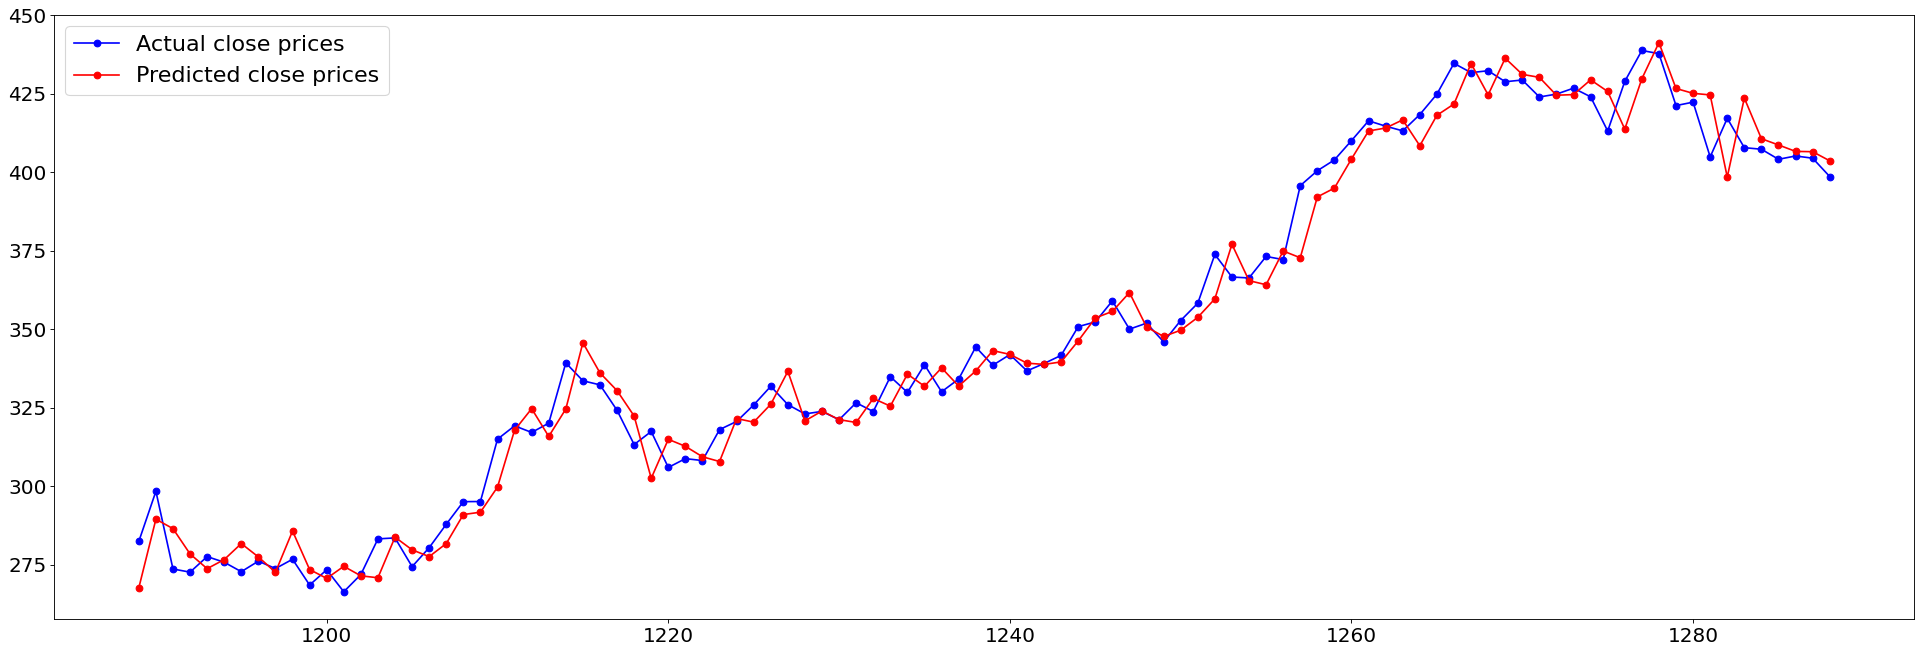

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), dpi=80)
plt.rcParams.update({'font.size': 18})

x_axis = np.array(test_data.index[0:num_days_to_predict])
plt.plot(x_axis, test_data.iloc[0:num_days_to_predict]['Close Price'], 'bo-', label="Actual close prices")
plt.plot(x_axis, predicted_close_prices, 'ro-', label="Predicted close prices")
plt.legend(prop={'size': 20})
plt.show()

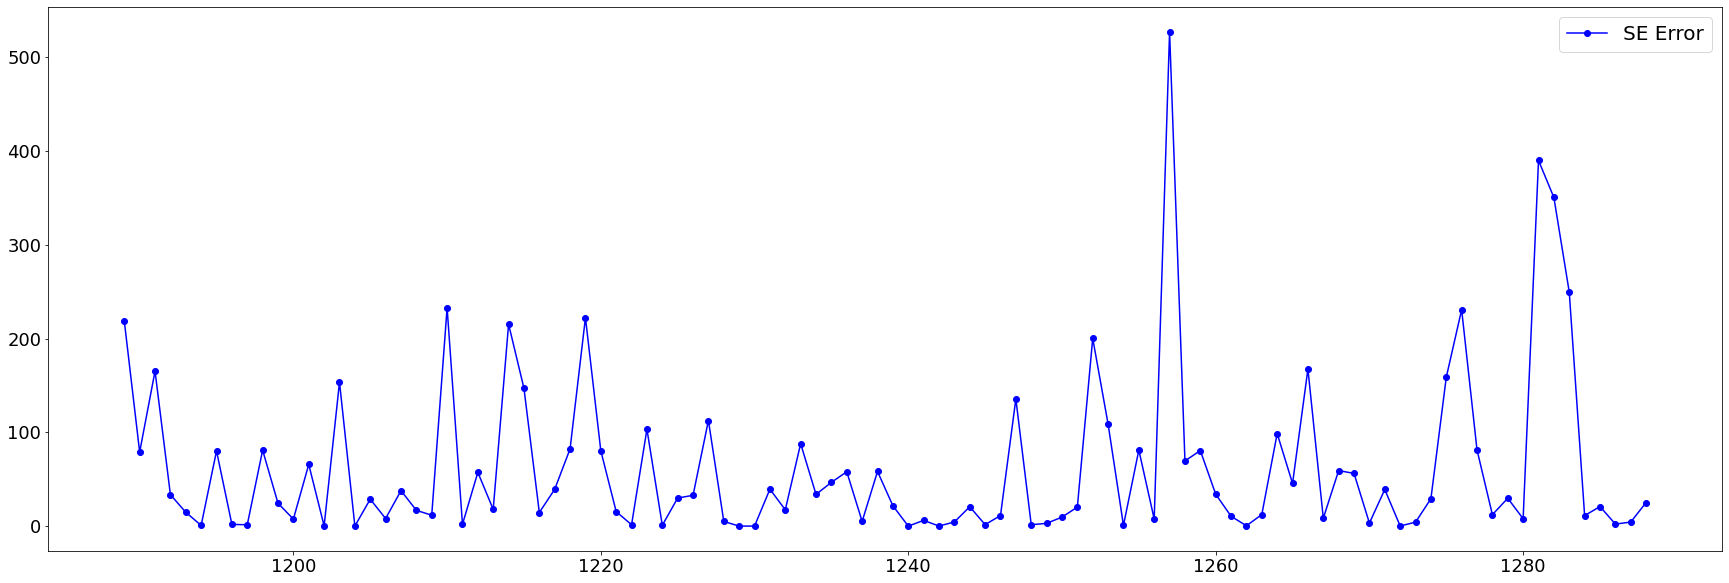

In [29]:
mse = (test_data.iloc[0:num_days_to_predict]['Close Price'] - predicted_close_prices)*(test_data.iloc[0:num_days_to_predict]['Close Price'] - predicted_close_prices)
plt.figure(figsize=(30,10))


plt.plot(x_axis, mse, 'bo-', label="SE Error")
plt.legend(prop={'size': 20})
plt.show()

new train test split

In [43]:
train_size = int(0.2*data.shape[0])
print(train_size)

297


In [44]:
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size+1:]

In [56]:
test_data

,Close Price,Open Price,High Price,Low Price
298,361.55,359.50,363.70,355.40
299,365.45,362.00,369.60,359.40
300,369.30,365.45,371.95,365.25
301,376.30,377.20,379.35,372.20
302,371.90,376.30,378.20,370.95
...,...,...,...,...
1480,1184.05,1174.95,1189.20,1163.20
1481,1172.45,1186.00,1195.00,1165.50
1482,1166.85,1179.50,1190.95,1162.50
1483,1163.35,1170.05,1176.55,1156.90


In [46]:
def augment_features(dataframe):
    fracocp = (dataframe['Close Price']-dataframe['Open Price'])/dataframe['Open Price']
    frachp = (dataframe['High Price']-dataframe['Open Price'])/dataframe['Open Price']
    fraclp = (dataframe['Open Price']-dataframe['Low Price'])/dataframe['Open Price']
    new_dataframe = pd.DataFrame({'delOpenClose': fracocp,
                                 'delHighOpen': frachp,
                                 'delLowOpen': fraclp})
    new_dataframe.set_index(dataframe.index)
    
    return new_dataframe
def extract_features(dataframe):
    return np.column_stack((dataframe['delOpenClose'], dataframe['delHighOpen'], dataframe['delLowOpen']))    

In [48]:
features = extract_features(augment_features(train_data))

In [49]:
features.shape

(297, 3)

In [50]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from hmmlearn.hmm import GaussianHMM
model = GaussianHMM(n_components=10)
feature_train_data = augment_features(train_data)
features_train = extract_features(feature_train_data)
model.fit(features_train)
import itertools

test_augmented = augment_features(test_data)
fracocp = test_augmented['delOpenClose']
frachp = test_augmented['delHighOpen']
fraclp = test_augmented['delLowOpen']

sample_space_fracocp = np.linspace(fracocp.min(), fracocp.max(), 50)
sample_space_fraclp = np.linspace(fraclp.min(), frachp.max(), 10)
sample_space_frachp = np.linspace(frachp.min(), frachp.max(), 10)

possible_outcomes = np.array(list(itertools.product(sample_space_fracocp, sample_space_frachp, sample_space_fraclp)))

In [58]:
num_latent_days = 50
num_days_to_predict = 1187
from tqdm import tqdm

predicted_close_prices = []
for i in tqdm(range(num_days_to_predict)):

    previous_data_start_index = max(0, i - num_latent_days)
    previous_data_end_index = max(0, i)

    previous_data = extract_features(augment_features(test_data.iloc[previous_data_start_index:previous_data_end_index]))
    
    outcome_scores = []
    for outcome in possible_outcomes:
        total_data = np.row_stack((previous_data, outcome))
        outcome_scores.append(model.score(total_data))
        
    most_probable_outcome = possible_outcomes[np.argmax(outcome_scores)]
    predicted_close_prices.append(test_data.iloc[i]['Open Price'] * (1 + most_probable_outcome[0]))

100%|██████████| 1187/1187 [50:37<00:00,  2.56s/it]


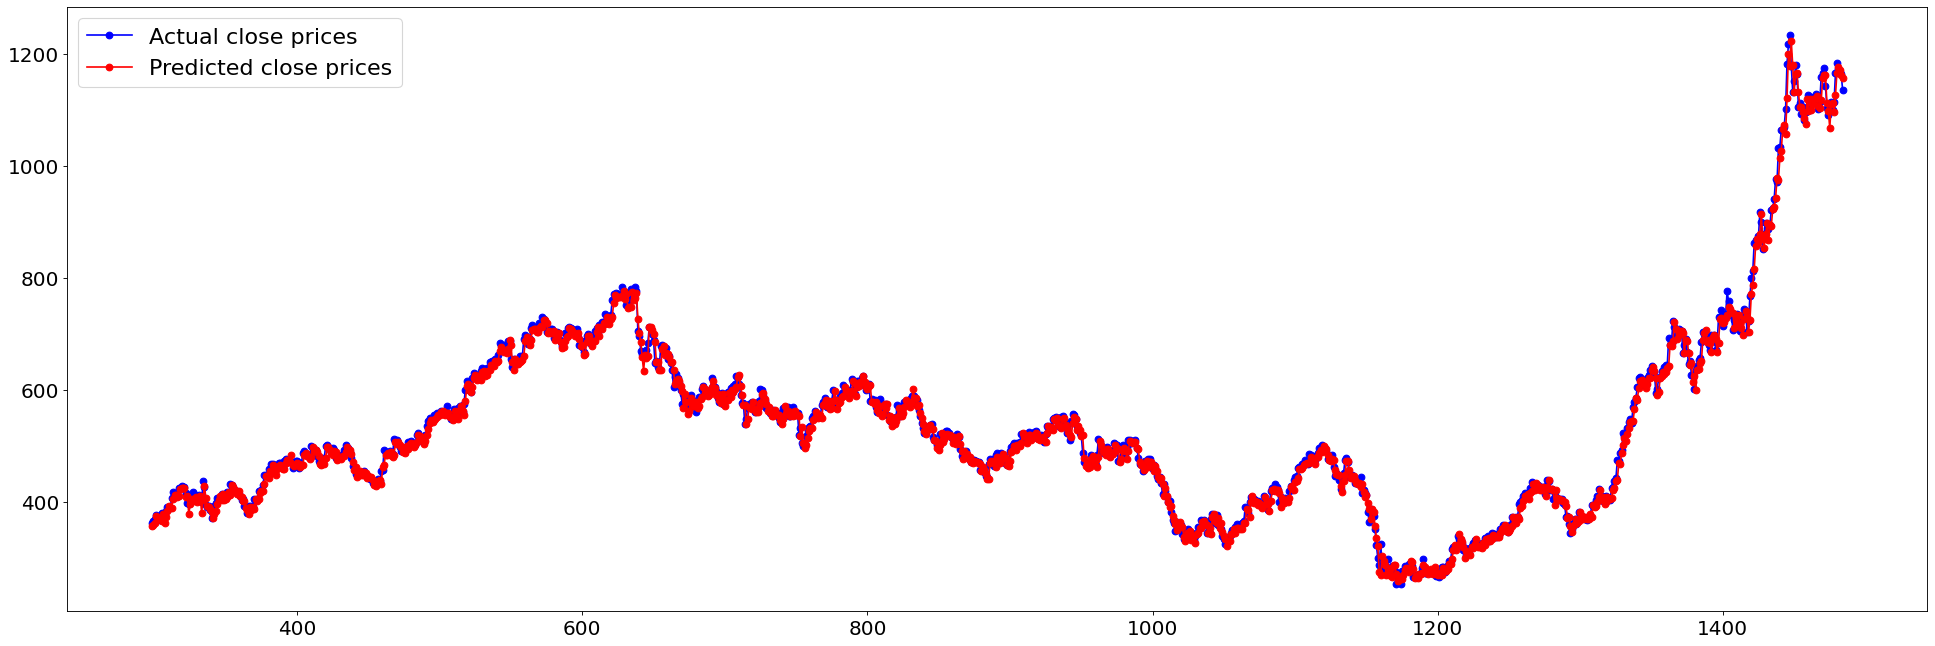

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), dpi=80)
plt.rcParams.update({'font.size': 18})

x_axis = np.array(test_data.index[0:num_days_to_predict])
plt.plot(x_axis, test_data.iloc[0:num_days_to_predict]['Close Price'], 'bo-', label="Actual close prices")
plt.plot(x_axis, predicted_close_prices, 'ro-', label="Predicted close prices")
plt.legend(prop={'size': 20})
plt.show()

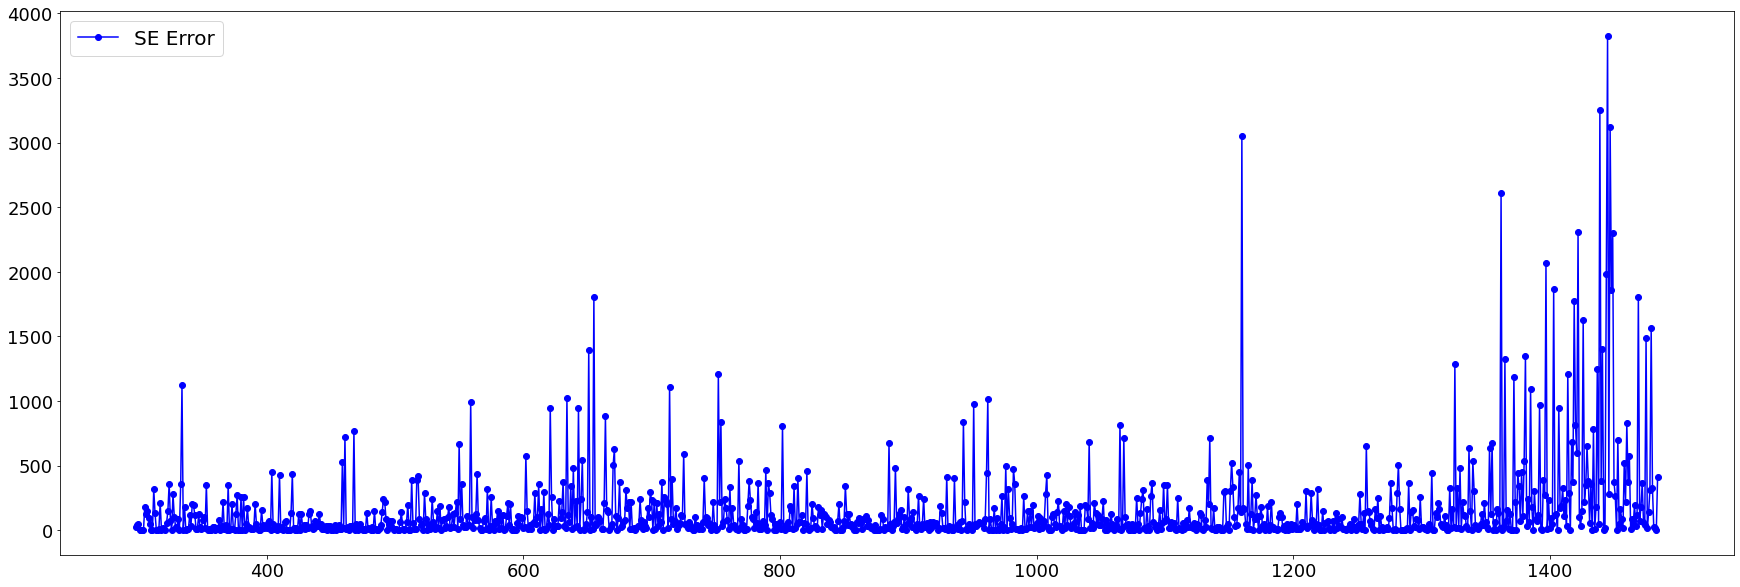

In [60]:
mse = (test_data.iloc[0:num_days_to_predict]['Close Price'] - predicted_close_prices)*(test_data.iloc[0:num_days_to_predict]['Close Price'] - predicted_close_prices)
plt.figure(figsize=(30,10))


plt.plot(x_axis, mse, 'bo-', label="SE Error")
plt.legend(prop={'size': 20})
plt.show()

In [61]:
print("MSE = " + str(mse.mean()))

MSE = 149.8389777820646


12 hidden **states**

In [101]:
train_size = int(0.8*data.shape[0])
print(train_size)

1188


In [102]:
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size+1:]

In [103]:
test_data

,Close Price,Open Price,High Price,Low Price
1189,282.50,274.45,286.00,271.4
1190,298.45,289.00,304.30,289.0
1191,273.70,286.00,286.20,270.6
1192,272.70,277.95,282.35,271.1
1193,277.65,274.00,280.50,272.2
...,...,...,...,...
1480,1184.05,1174.95,1189.20,1163.2
1481,1172.45,1186.00,1195.00,1165.5
1482,1166.85,1179.50,1190.95,1162.5
1483,1163.35,1170.05,1176.55,1156.9


In [104]:
def augment_features(dataframe):
    fracocp = (dataframe['Close Price']-dataframe['Open Price'])/dataframe['Open Price']
    frachp = (dataframe['High Price']-dataframe['Open Price'])/dataframe['Open Price']
    fraclp = (dataframe['Open Price']-dataframe['Low Price'])/dataframe['Open Price']
    new_dataframe = pd.DataFrame({'delOpenClose': fracocp,
                                 'delHighOpen': frachp,
                                 'delLowOpen': fraclp})
    new_dataframe.set_index(dataframe.index)
    
    return new_dataframe

In [105]:
def extract_features(dataframe):
    return np.column_stack((dataframe['delOpenClose'], dataframe['delHighOpen'], dataframe['delLowOpen']))

In [106]:
features = extract_features(augment_features(train_data))

In [107]:
features.shape

(1188, 3)

In [81]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
from hmmlearn.hmm import GaussianHMM
model = GaussianHMM(n_components=2)
feature_train_data = augment_features(train_data)
features_train = extract_features(feature_train_data)
model.fit(features_train)
import itertools

test_augmented = augment_features(test_data)
fracocp = test_augmented['delOpenClose']
frachp = test_augmented['delHighOpen']
fraclp = test_augmented['delLowOpen']

sample_space_fracocp = np.linspace(fracocp.min(), fracocp.max(), 50)
sample_space_fraclp = np.linspace(fraclp.min(), frachp.max(), 10)
sample_space_frachp = np.linspace(frachp.min(), frachp.max(), 10)

possible_outcomes = np.array(list(itertools.product(sample_space_fracocp, sample_space_frachp, sample_space_fraclp)))

In [125]:
num_latent_days = 10
num_days_to_predict = 100
from tqdm import tqdm

predicted_close_prices = []
for i in tqdm(range(num_days_to_predict)):
    # Calculate start and end indices
    previous_data_start_index = max(0, i - num_latent_days)
    previous_data_end_index = max(0, i)
    # Acquire test data features for these days
    previous_data = extract_features(augment_features(test_data.iloc[previous_data_start_index:previous_data_end_index]))
    
    outcome_scores = []
    for outcome in possible_outcomes:
        # Append each outcome one by one with replacement to see which sequence generates the highest score
        total_data = np.row_stack((previous_data, outcome))
        outcome_scores.append(model.score(total_data))
        
    # Take the most probable outcome as the one with the highest score
    most_probable_outcome = possible_outcomes[np.argmax(outcome_scores)]
    predicted_close_prices.append(test_data.iloc[i]['Open Price'] * (1 + most_probable_outcome[0]))

100%|██████████| 100/100 [02:40<00:00,  1.60s/it]


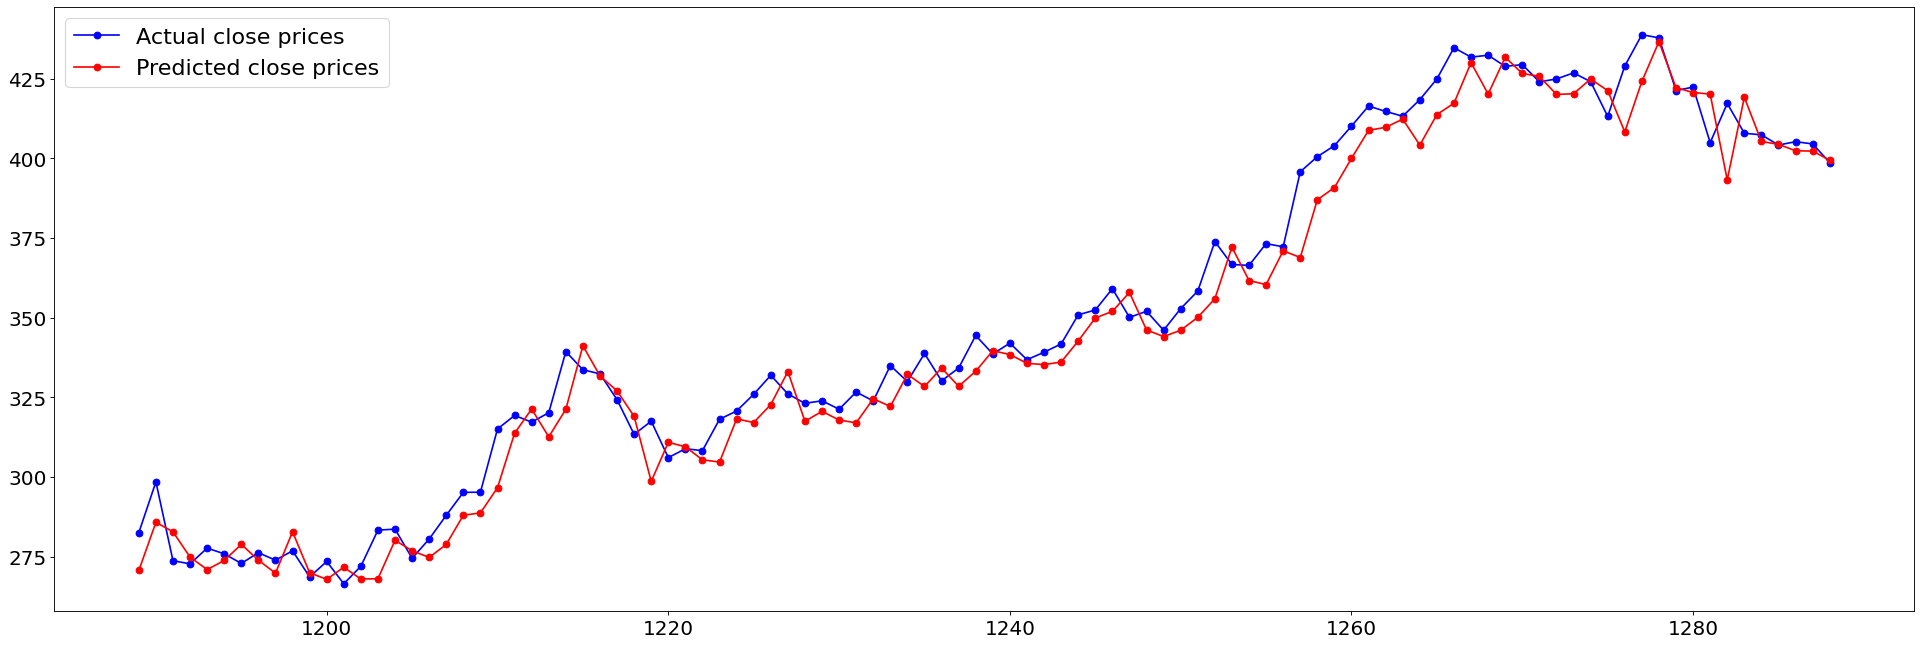

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), dpi=80)
plt.rcParams.update({'font.size': 18})

x_axis = np.array(test_data.index[0:num_days_to_predict])
plt.plot(x_axis, test_data.iloc[0:num_days_to_predict]['Close Price'], 'bo-', label="Actual close prices")
plt.plot(x_axis, predicted_close_prices, 'ro-', label="Predicted close prices")
plt.legend(prop={'size': 20})
plt.show()

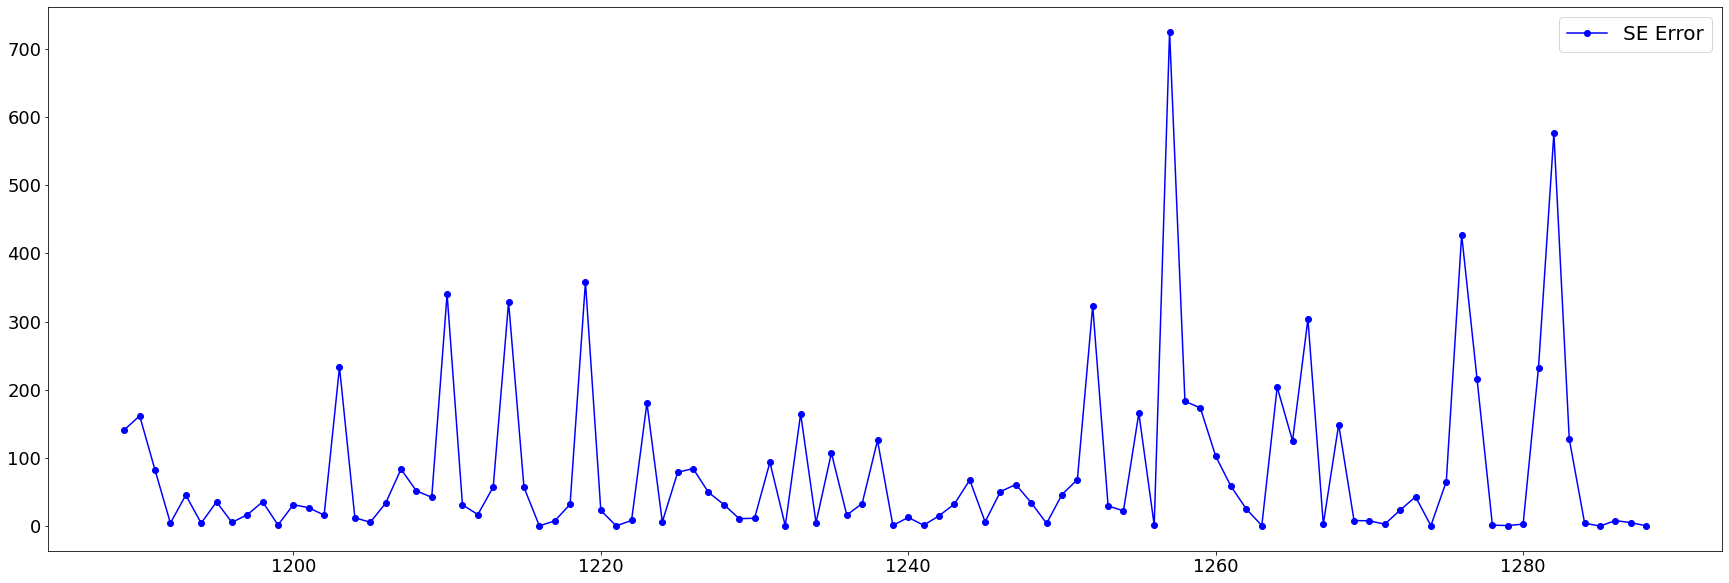

In [127]:
mse = (test_data.iloc[0:num_days_to_predict]['Close Price'] - predicted_close_prices)*(test_data.iloc[0:num_days_to_predict]['Close Price'] - predicted_close_prices)
plt.figure(figsize=(30,10))


plt.plot(x_axis, mse, 'bo-', label="SE Error")
plt.legend(prop={'size': 20})
plt.show()

In [130]:
#@title
print("MSE = " + str(mse.mean()))

MSE = 80.79707074896855
